In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

%matplotlib inline

In [ ]:
df=load_digits()
df.images.shape

(1797, 8, 8)

we have 1797 images of 8x8

reducing the colors in picture

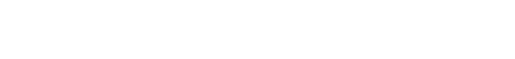

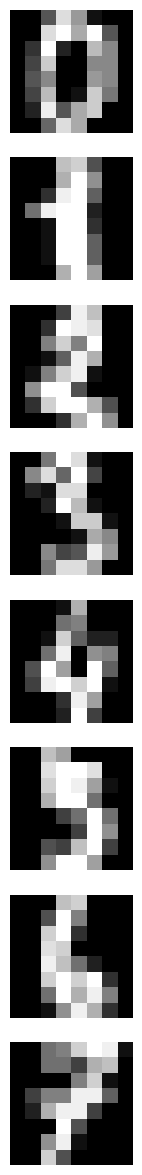

In [ ]:
plt.subplot(8,1,1)
plt.axis('off')
plt.figure(figsize=(15,15))

for i,image in zip(range(1,9),df.images[0:8]):
    image.reshape(8,8)
    plt.subplot(8,1,i)
    plt.imshow(image,cmap='gray')
    plt.axis('off')

In [ ]:
df_img_resh=df.images.reshape((-1,64))
df_img_resh.shape

(1797, 64)

In [55]:
X_train,X_test,y_train,y_test=train_test_split(df_img_resh,df.target,test_size=0.3)

In [60]:
model=RandomForestClassifier()
dist=dict(n_estimators=[5,10,15],max_depth=[5,10,15],min_samples_leaf=[5,10,15])

In [61]:
clf=RandomizedSearchCV(model,dist,cv=5,n_jobs=-1,verbose=2,scoring='accuracy')
clf.fit(X_train,y_train)
clf.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomForestClassifier(max_depth=15, min_samples_leaf=10, n_estimators=15)

In [62]:
clf.best_score_

np.float64(0.9164769493454752)

In [63]:
y_pred=clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9222222222222223

Our esimation does pretty well on training as well as testing Data